# Settings:

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
import os

## Read df:

In [3]:
df = pd.read_csv(os.path.join('Data', 'info.csv'))

## Check df:

In [4]:
for _, row in df.iterrows():
    if row['genre'] == "hiphiop":
        row['genre'] = "hiphop"
    if row['genre'] == "electronic ":
        row['genre'] = "electronic"

df.head()

,link,type_of_source,time_from,time_to,genre
0,https://www.youtube.com/watch?v=UKq-Uz2ZTPw&li...,Show,00:00:20,00:03:43,hiphop
1,https://www.youtube.com/watch?v=nerSkOMcZaA&li...,Show,00:00:34,00:04:31,pop
2,https://www.youtube.com/watch?v=qBX_iXOmQ_4&li...,Show,00:00:39,00:03:50,pop
3,https://www.youtube.com/watch?v=Y_DFEPFCmTg&li...,Show,00:01:14,00:04:36,metal
4,https://www.youtube.com/watch?v=pWkB9NZi7tw&li...,Show,00:00:58,00:04:35,pop


## Count durations:

In [5]:
dur_list = []
for _, row in df.iterrows(): 
    begin = datetime.strptime(row['time_from'], "%H:%M:%S")
    end = datetime.strptime(row['time_to'], "%H:%M:%S")
    duration = (end - begin).total_seconds()
    dur_list.append(duration)

dur_df = pd.DataFrame({"duration": dur_list})

complete_df = pd.concat([df, dur_df], axis=1)

## Calculate source durations:

In [6]:
dur_src_dict = { "Show": 0,
                 "Contest": 0,
                 "Concert": 0}
for _, row in complete_df.iterrows():
    duration = row['duration']
    prev_dur = dur_src_dict[row['type_of_source']]
    duration += prev_dur
    dur_src_dict.update({row['type_of_source']: duration})

print(dur_src_dict)

{'Show': 32788.0, 'Contest': 11593.0, 'Concert': 61606.0}


## Calculate genres durations:

In [7]:
genre_dict = {}

for _, row in complete_df.iterrows():
    duration = row['duration']
    if row['genre'] in genre_dict:
        genre_dict.update({row['genre']: duration + genre_dict[row['genre']]})
    else:
        genre_dict.update({row['genre']: duration})

print(genre_dict)

{'hiphop': 13360.0, 'pop': 48780.0, 'metal': 2496.0, 'rock': 21695.0, 'electronic': 2634.0, 'jazz': 254.0, 'indi': 5051.0, 'blues': 3266.0, 'classical': 949.0, 'folk': 3920.0, 'country': 2332.0, 'disco': 403.0, 'reggae': 847.0}


In [8]:
# check tyops (old)

for _, row in complete_df.iterrows():
    if row['genre'] == "electronic " or row['genre'] == "hiphiop":
        print(row)

# Make plots:

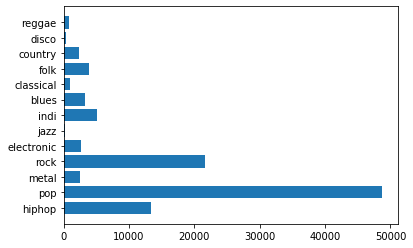

In [9]:
plt.barh(range(len(genre_dict)), genre_dict.values(), tick_label=list(genre_dict.keys()), align='center')
plt.savefig(os.path.join('Plots', 'genres.png'))
plt.show()

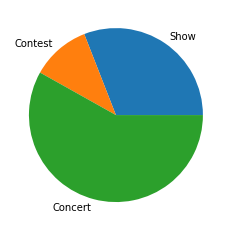

In [10]:
plt.pie(list(dur_src_dict.values()), labels=list(dur_src_dict.keys()))
plt.savefig(os.path.join('Plots', 'Sources.png'))
plt.show()

## Split 70/30

In [11]:
train, test = train_test_split(complete_df, test_size=0.3)

In [12]:
def source_dict(data_frame):
    dur_src_dict = { "Show": 0,
                     "Contest": 0,
                     "Concert": 0}
    for _, row in data_frame.iterrows():
        duration = row['duration']
        prev_dur = dur_src_dict[row['type_of_source']]
        duration += prev_dur
        dur_src_dict.update({row['type_of_source']: duration})

    return dur_src_dict

def genres_dict(data_frame):
    genre_dict = {}

    for _, row in data_frame.iterrows():
        duration = row['duration']
        if row['genre'] in genre_dict:
            genre_dict.update({row['genre']: duration + genre_dict[row['genre']]})
        else:
            genre_dict.update({row['genre']: duration})
    return genre_dict

## Plots:

In [13]:
def make_plots(name, data_frame):
    genre_dict = genres_dict(data_frame)
    dur_src_dict = source_dict(data_frame)
    plt.barh(range(len(genre_dict)), genre_dict.values(), tick_label=list(genre_dict.keys()), align='center')
    plt.savefig(name + 'genres.png')
    plt.show()
    plt.pie(list(dur_src_dict.values()), labels=list(dur_src_dict.keys()))
    plt.savefig(name + 'Sources.png')
    plt.show()

## Train plots:

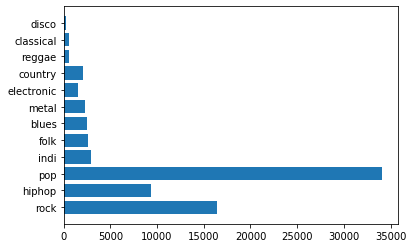

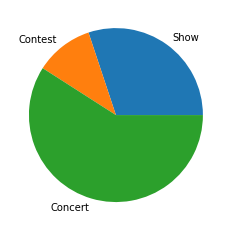

In [14]:
make_plots(os.path.join('Plots', 'train_'), train)

## Test plots:

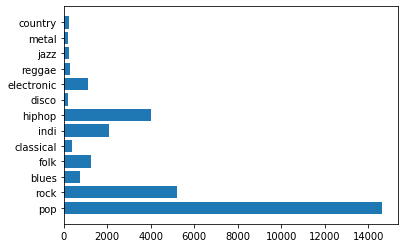

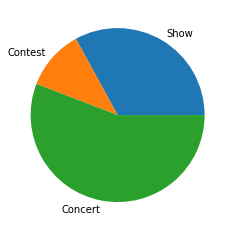

In [15]:
make_plots(os.path.join('Plots', 'test_'), test)